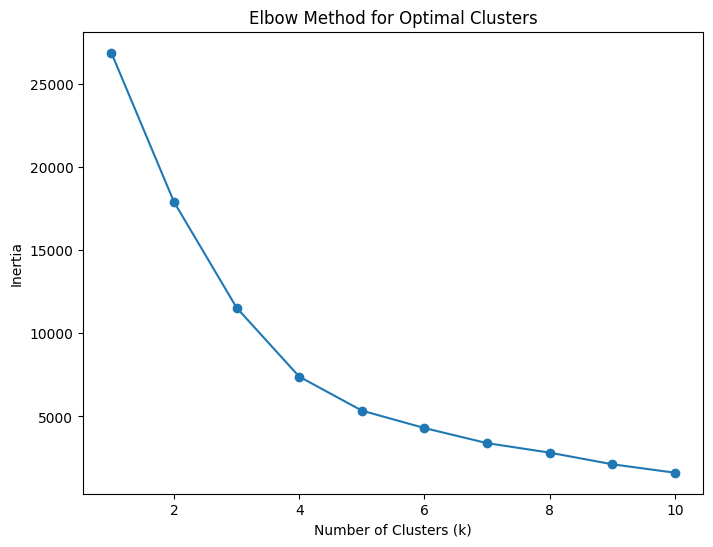

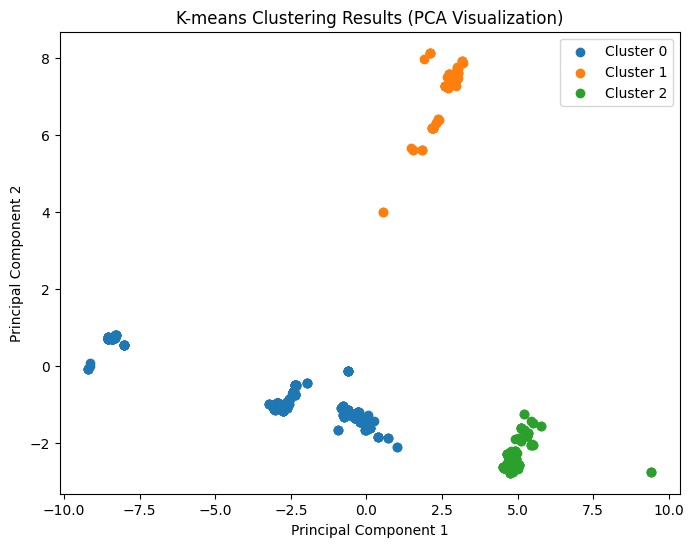

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Step 1: Load the data
file_path = '/content/dx samples ratio to median rb scna (2).xlsx'  # Replace with your file path
df = pd.read_excel(file_path)

# Step 2: Clean the data
df_cleaned = df.rename(columns=df.iloc[0]).drop(index=0)  # Adjusting for headers
df_cleaned = df_cleaned.apply(pd.to_numeric, errors='coerce').reset_index(drop=True)  # Convert to numeric
df_cleaned = df_cleaned.dropna(how='all', axis=1).dropna(how='all', axis=0)  # Remove empty rows and columns

# Step 3: Normalize the data (only numerical columns)
numerical_columns = df_cleaned.columns[3:]  # Adjust the index to include relevant columns
scaler = StandardScaler()
normalized_data = scaler.fit_transform(df_cleaned[numerical_columns])

# Step 4: Handle missing values
df_imputed = pd.DataFrame(normalized_data).apply(lambda col: col.fillna(col.mean()), axis=0)

# Step 5: PCA for visualization
pca = PCA(n_components=2)
pca_data = pca.fit_transform(df_imputed)

# Step 6: Determine optimal clusters (elbow method)
k_values = range(1, 11)
inertia = []
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_imputed)
    inertia.append(kmeans.inertia_)

# Plot elbow method
plt.figure(figsize=(8, 6))
plt.plot(k_values, inertia, marker='o')
plt.title("Elbow Method for Optimal Clusters")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.show()

# Step 7: Perform K-means clustering
optimal_clusters = 3  # Replace with your chosen number of clusters
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42, n_init=10)
clusters = kmeans.fit_predict(df_imputed)

# Step 8: Visualize clusters
plt.figure(figsize=(8, 6))
for cluster in range(optimal_clusters):
    plt.scatter(
        pca_data[clusters == cluster, 0],
        pca_data[clusters == cluster, 1],
        label=f"Cluster {cluster}"
    )
plt.title("K-means Clustering Results (PCA Visualization)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.show()

# Optional: Add cluster labels to the dataset and save
df_with_clusters = pd.DataFrame(df_imputed)
df_with_clusters['Cluster'] = clusters
df_with_clusters.to_csv('clustered_data.csv', index=False)


Cluster Summary (Mean Values for Each Feature):
                0         1         2         3         4         5         6  \
Cluster                                                                         
0        0.033234 -0.613675 -0.733477  0.156808  0.036845 -0.310385 -0.073945   
1        0.054431  0.289990  1.040431  0.730786 -0.226525  0.161413 -0.020049   
2       -0.108119  1.243995  1.083730 -0.785512  0.046806  0.620623  0.181846   

                7         8         9  ...        29        30        31  \
Cluster                                ...                                 
0       -0.628681 -0.614954 -0.573906  ... -0.557219 -0.762710 -0.529255   
1        1.999501  0.083746 -0.221896  ... -0.106510  1.638592 -0.486484   
2        0.285299  1.366767  1.449868  ...  1.344420  0.803480  1.500824   

               32        33        34        35        36        37        38  
Cluster                                                                        
0    

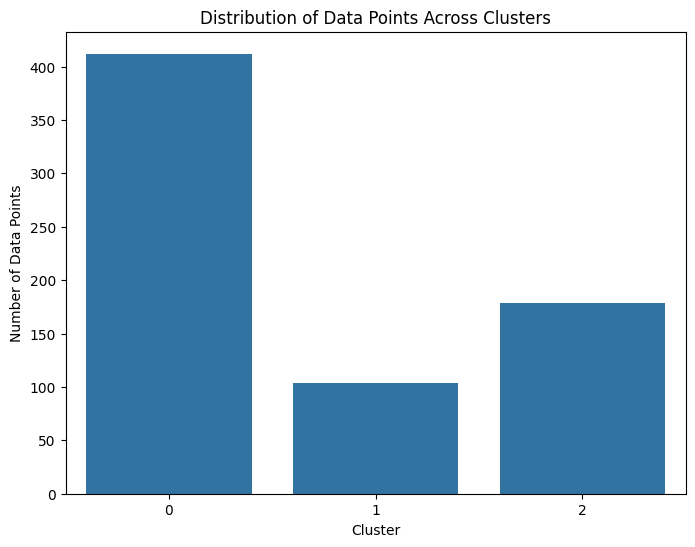

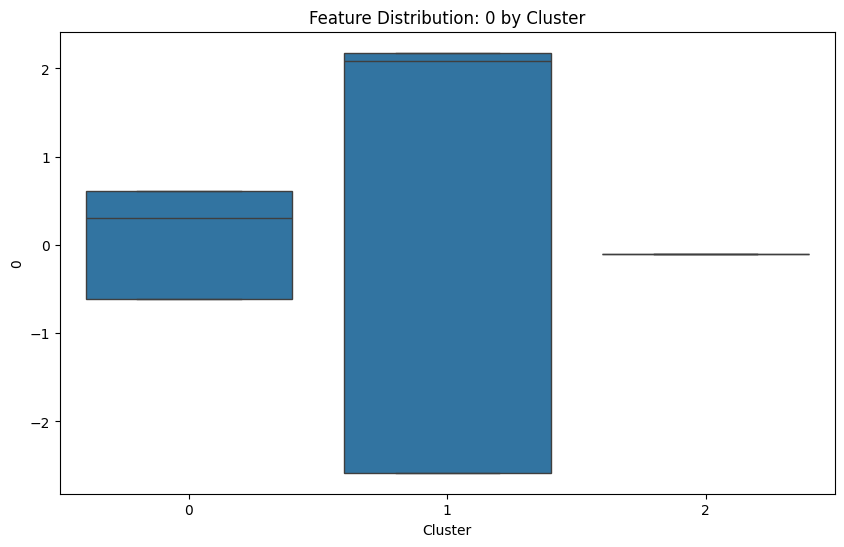

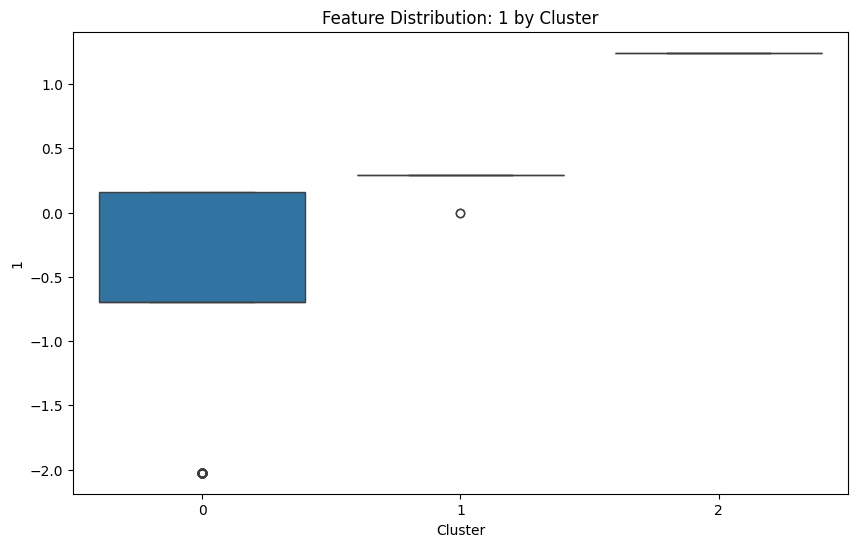

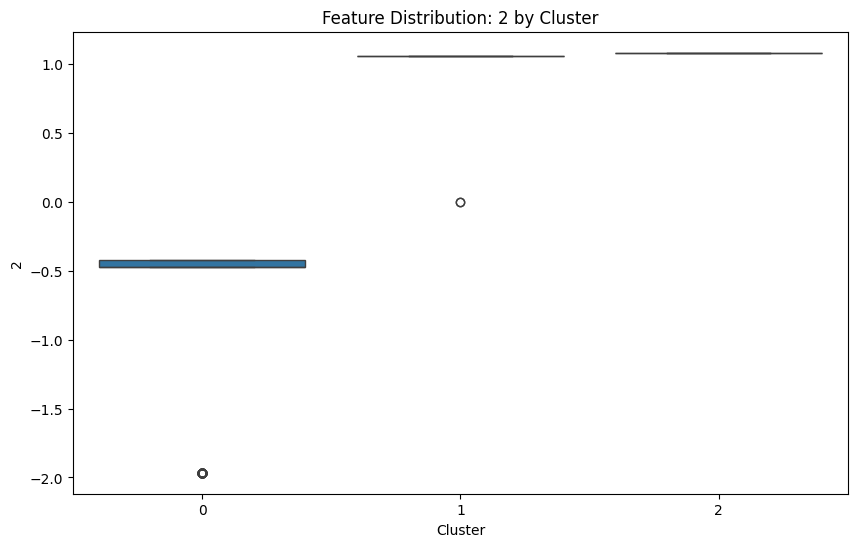

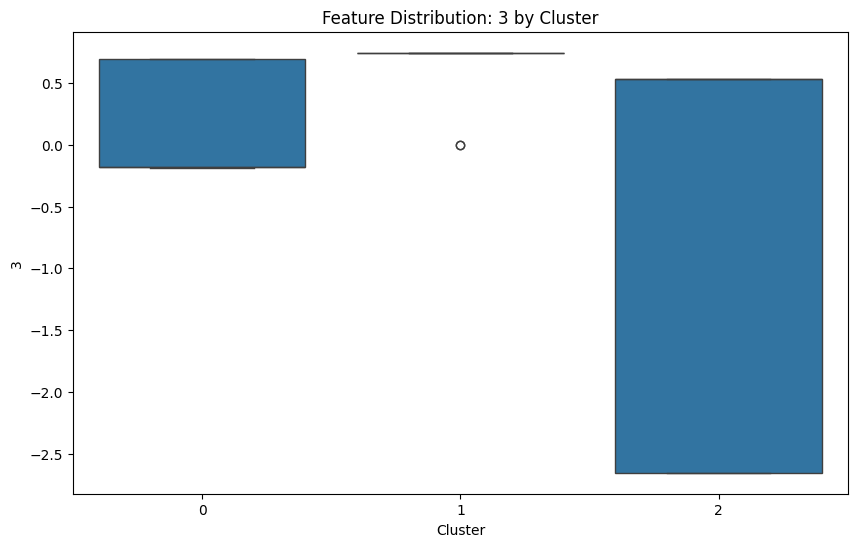

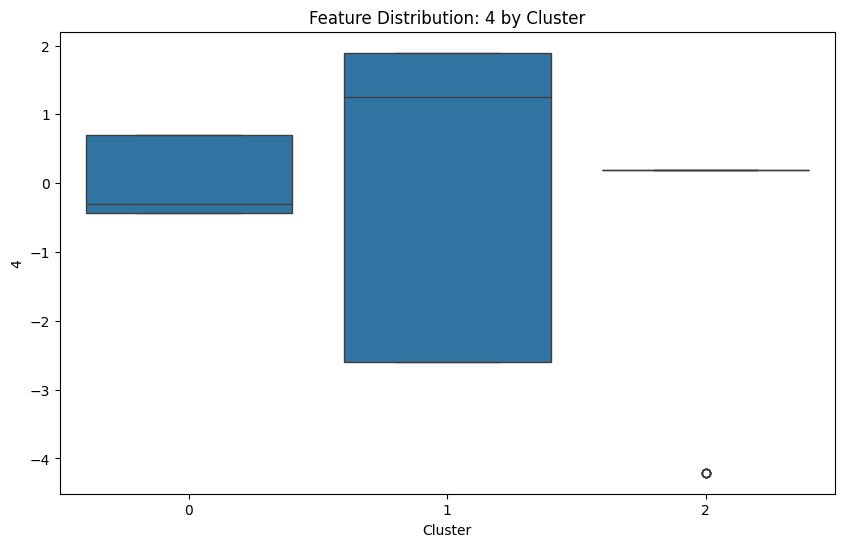

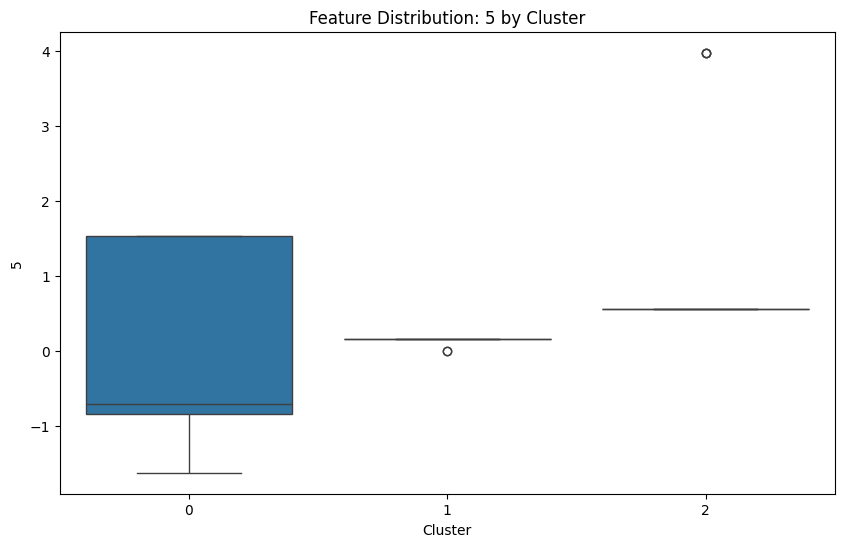

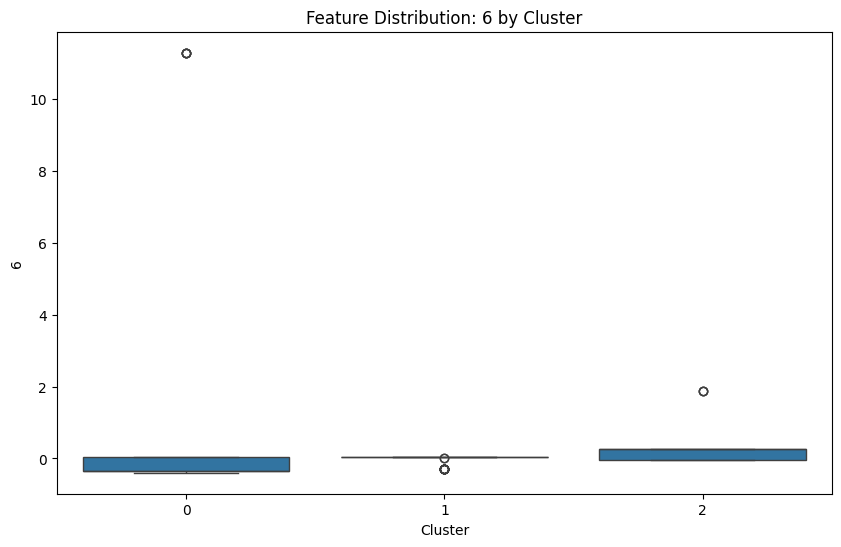

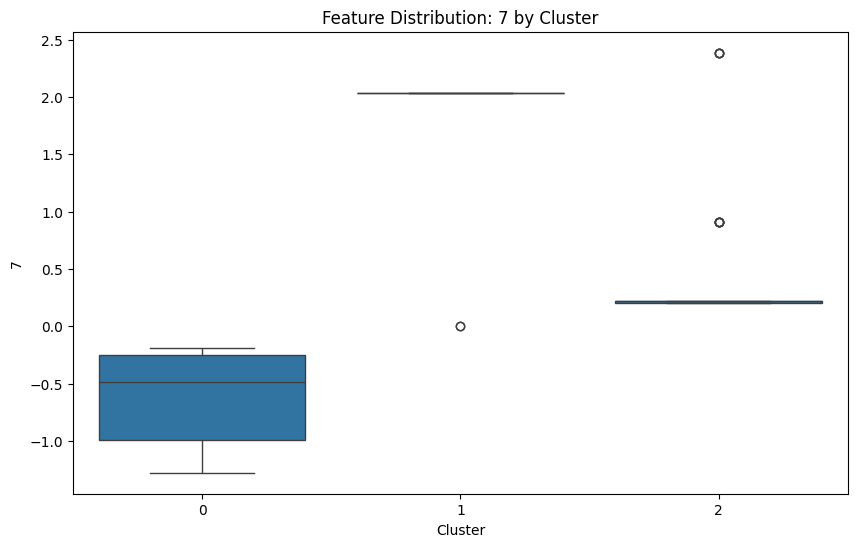

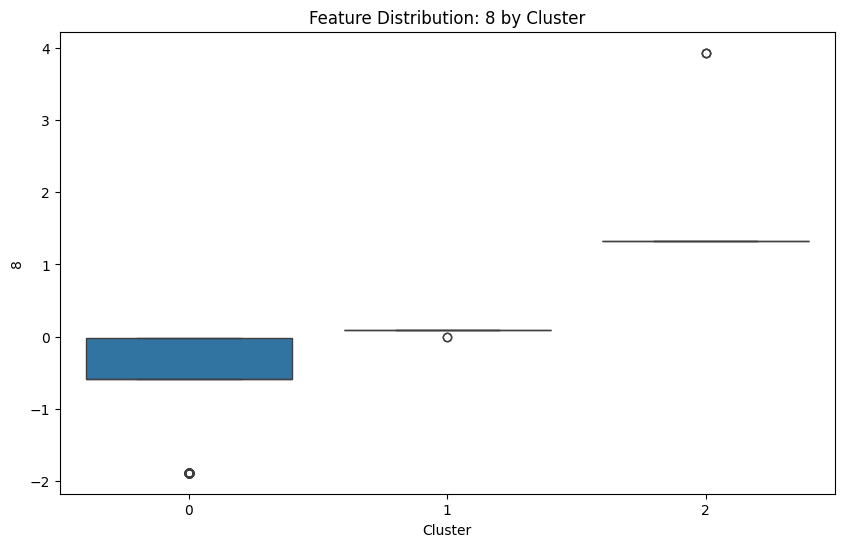

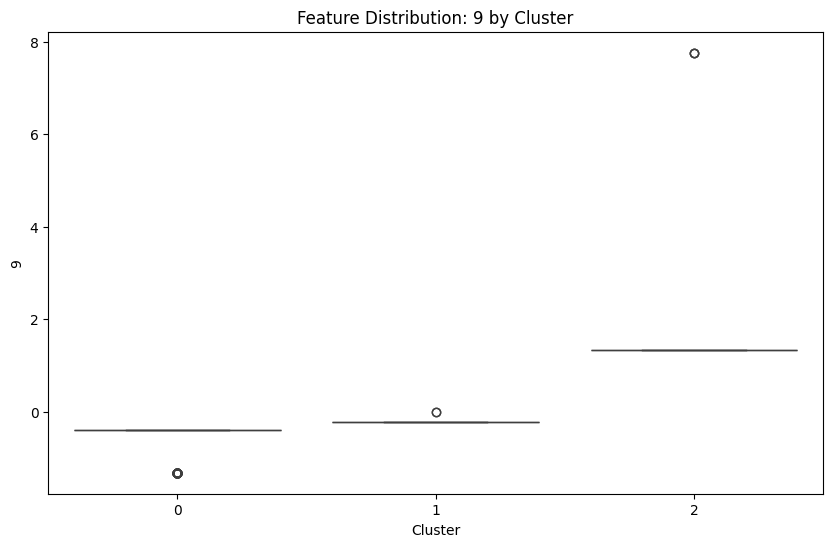

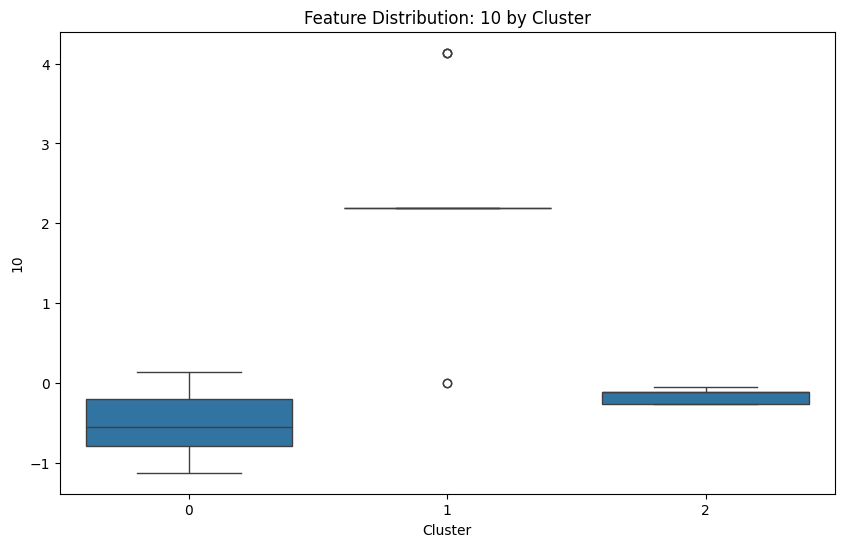

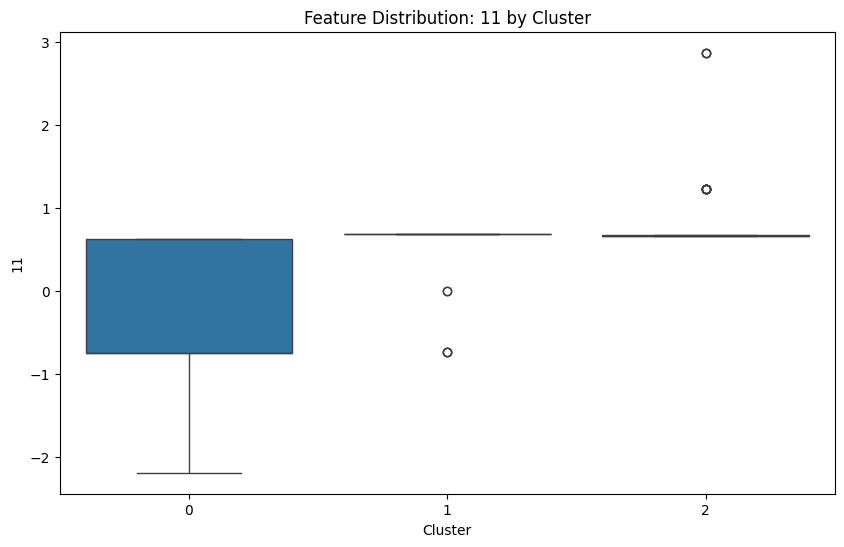

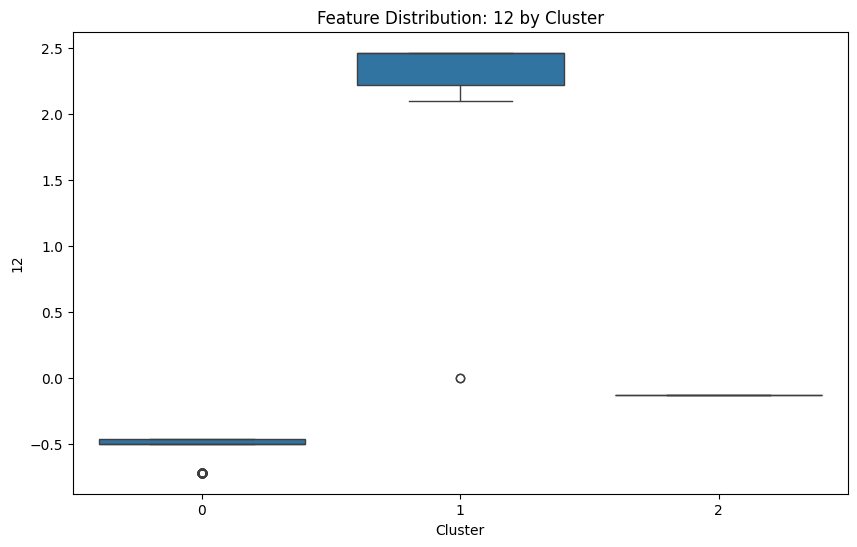

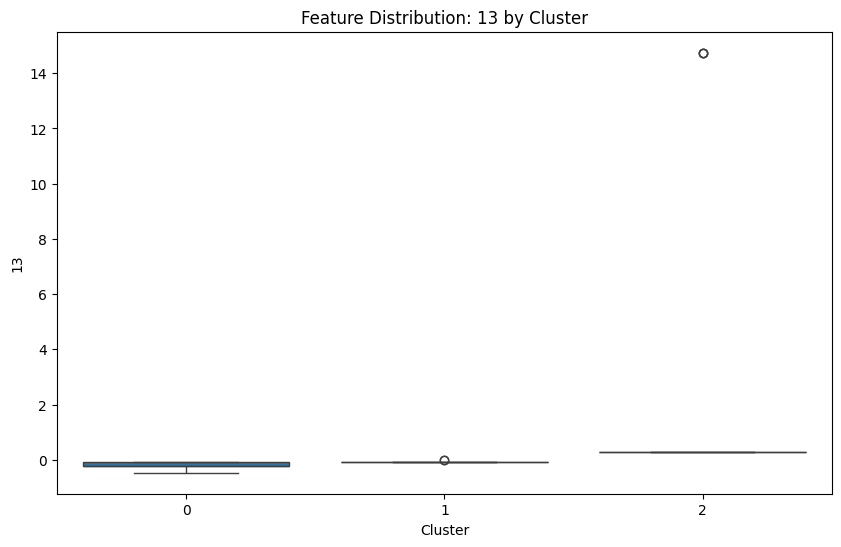

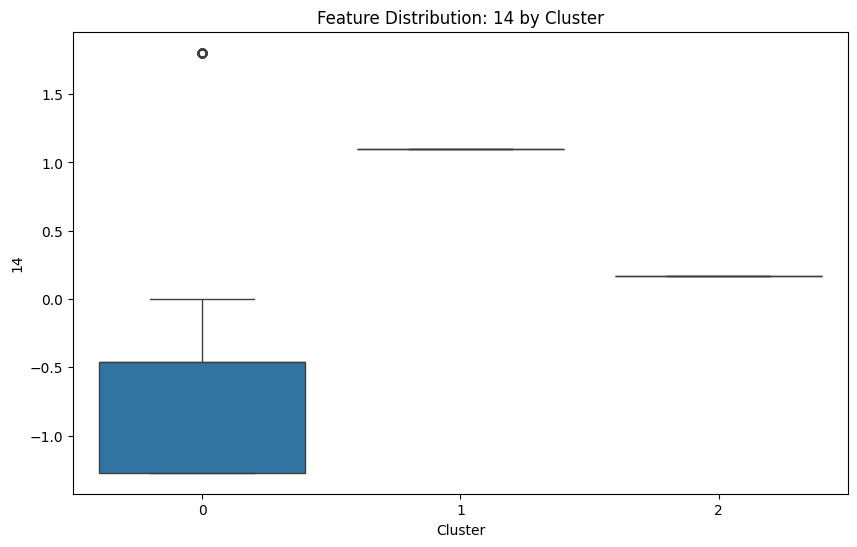

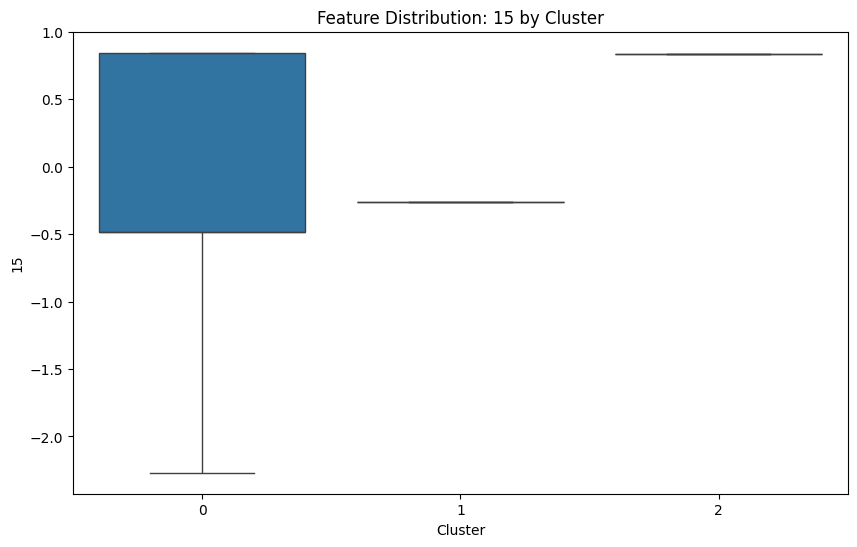

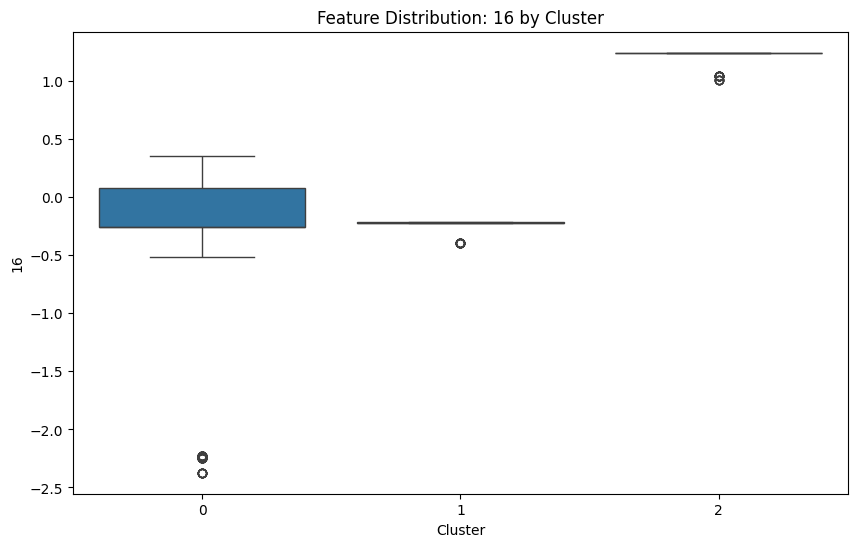

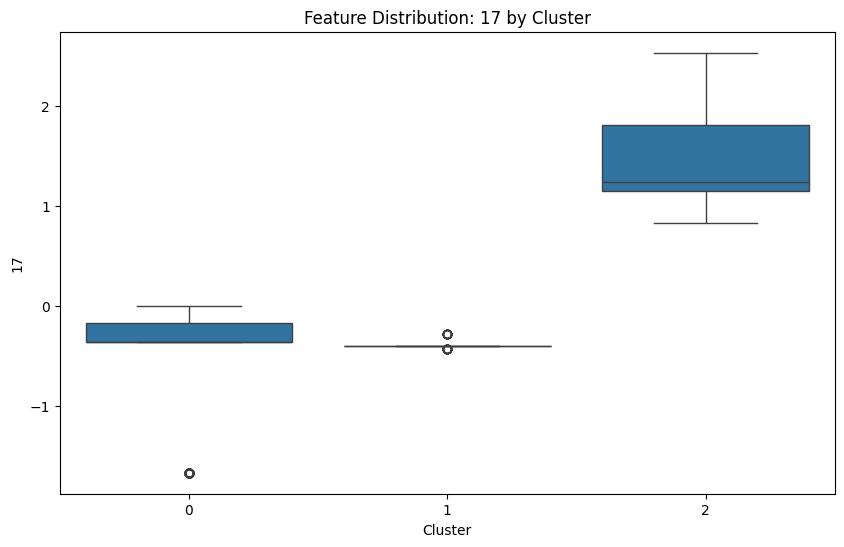

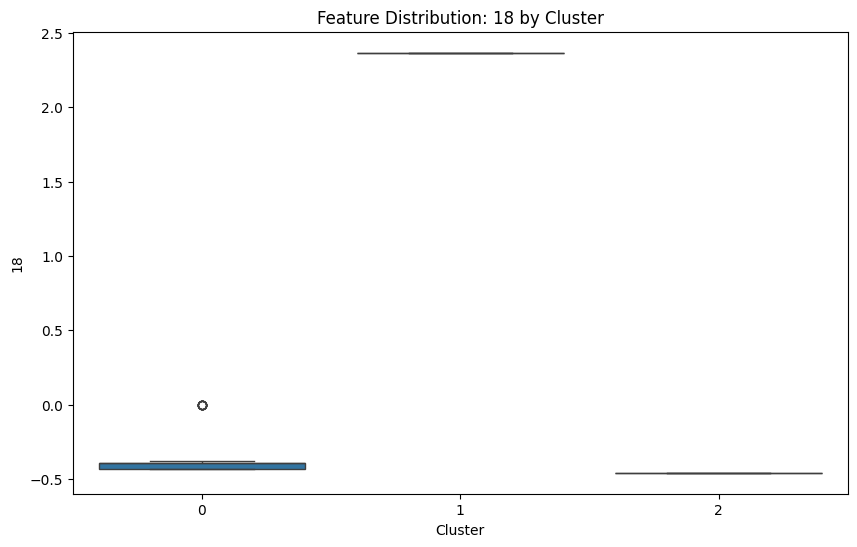

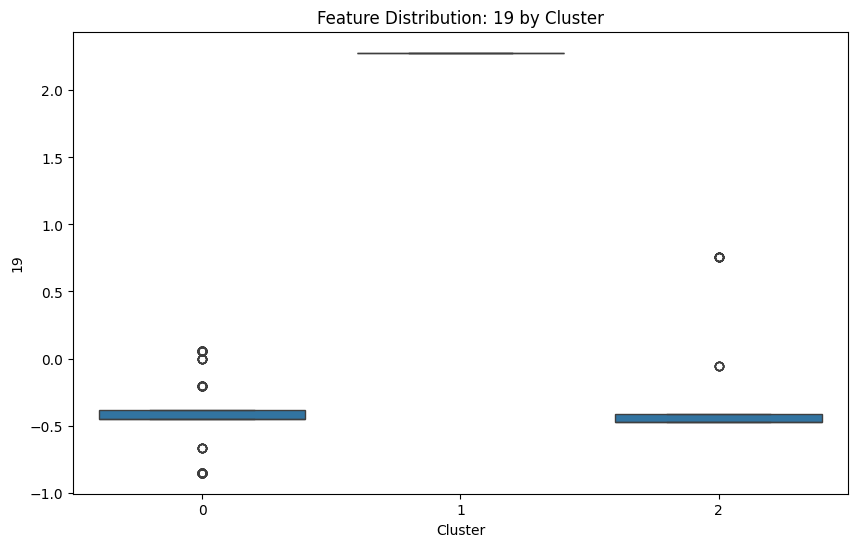

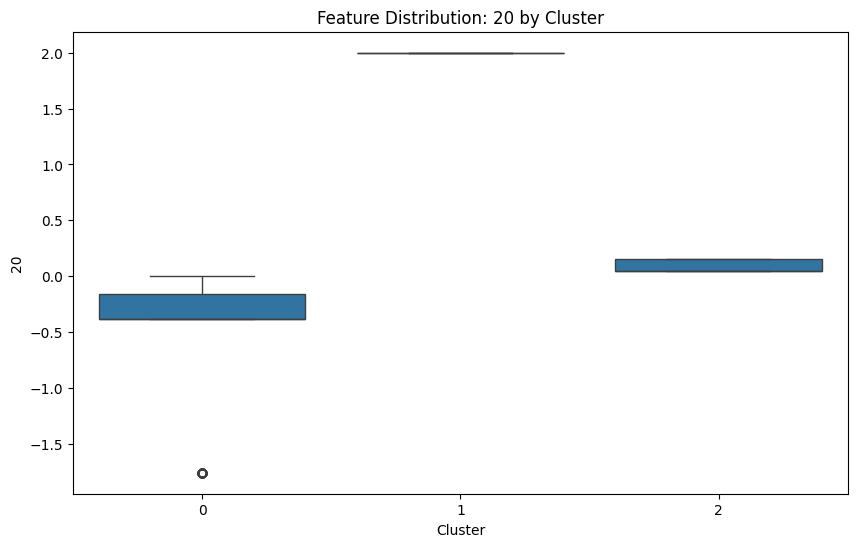

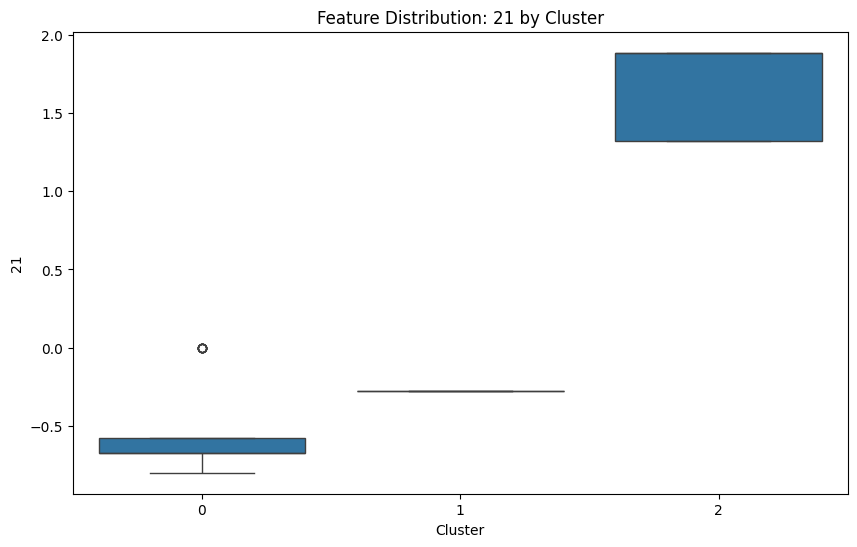

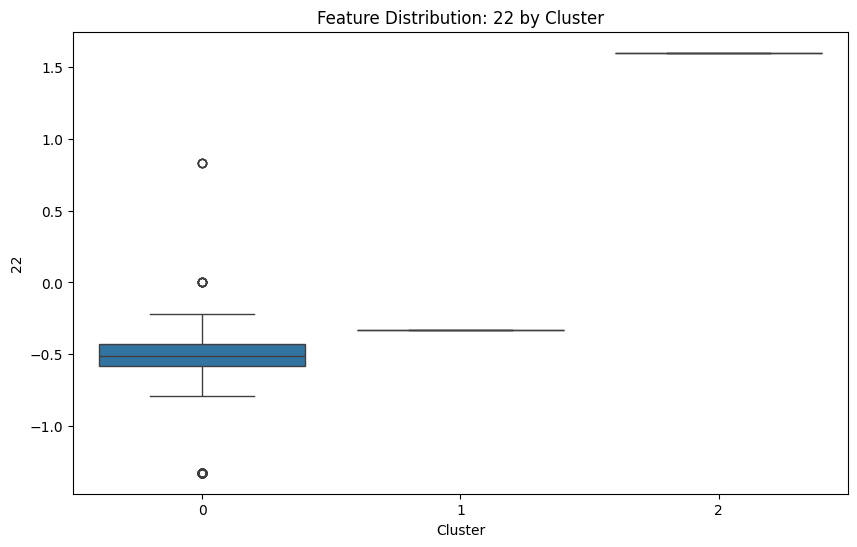

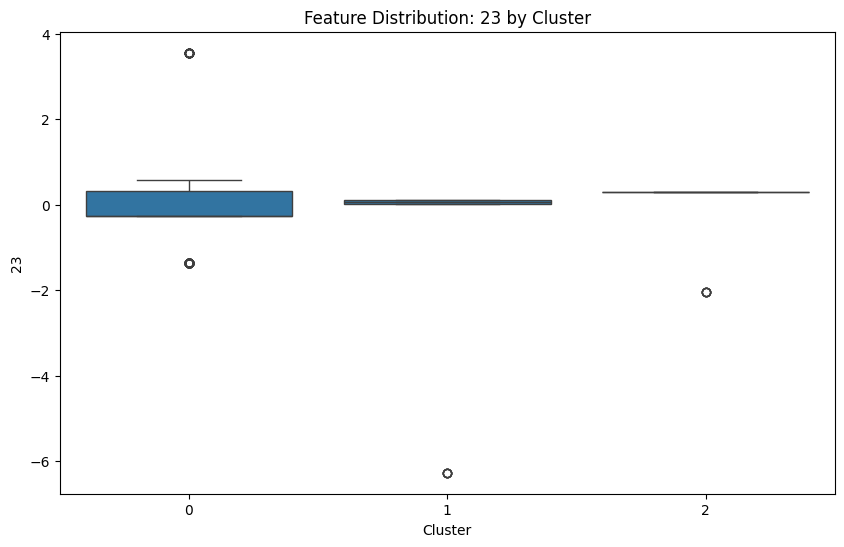

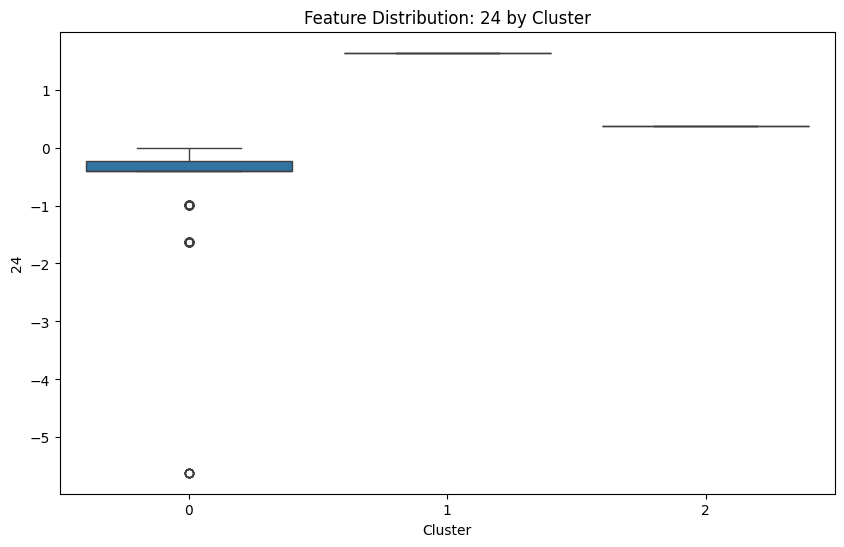

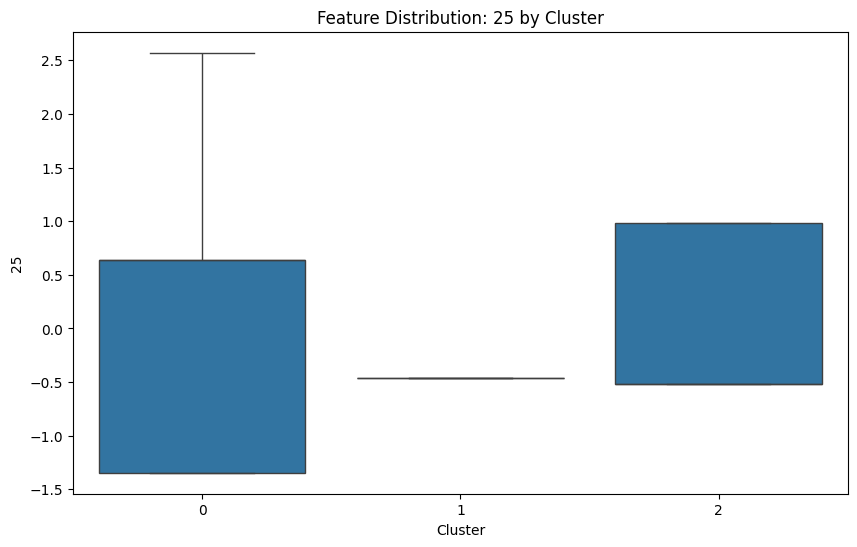

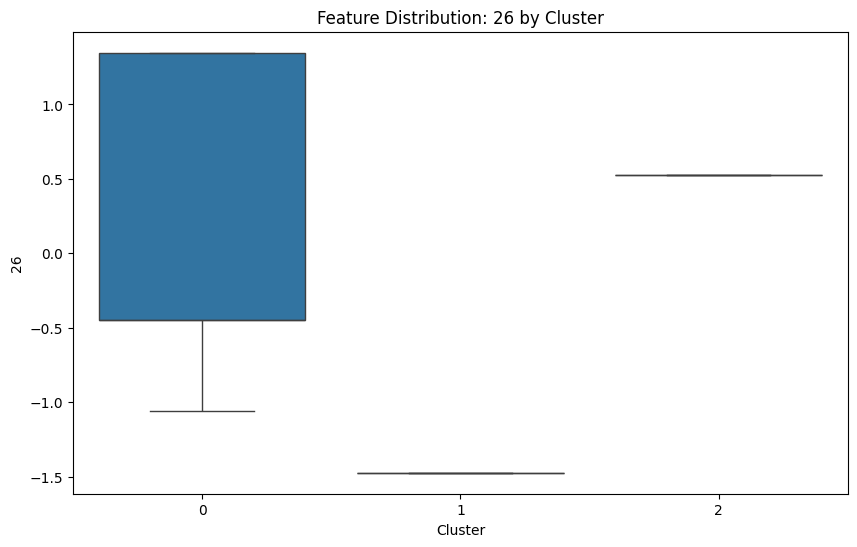

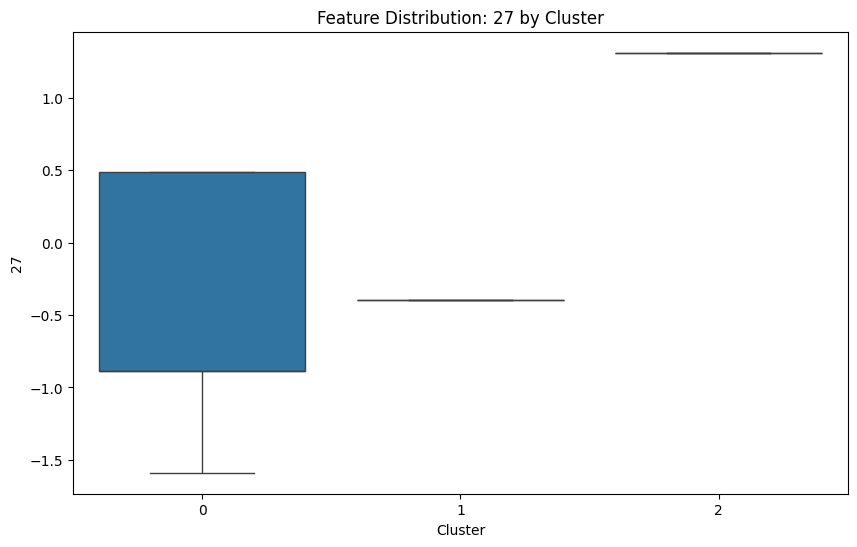

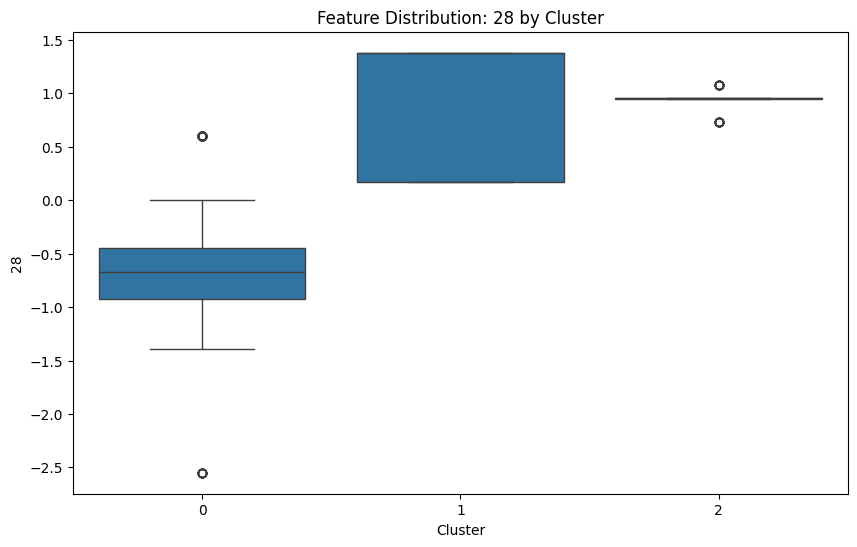

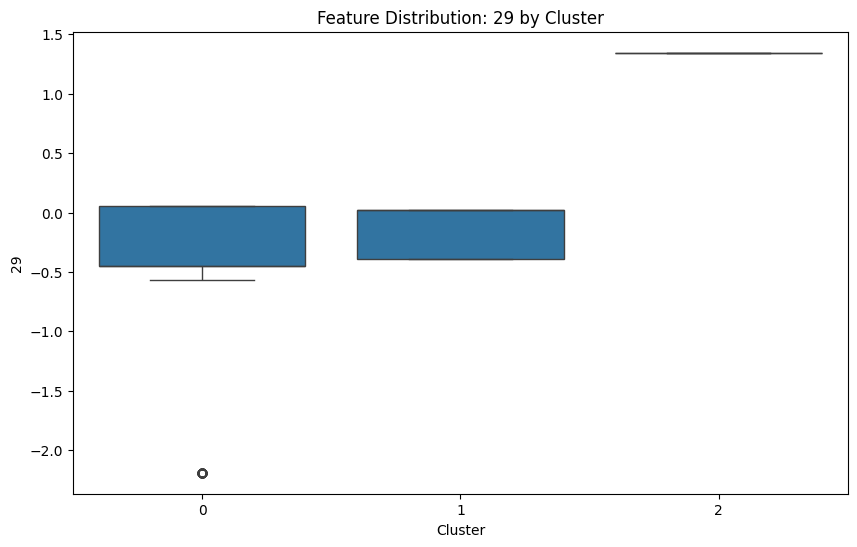

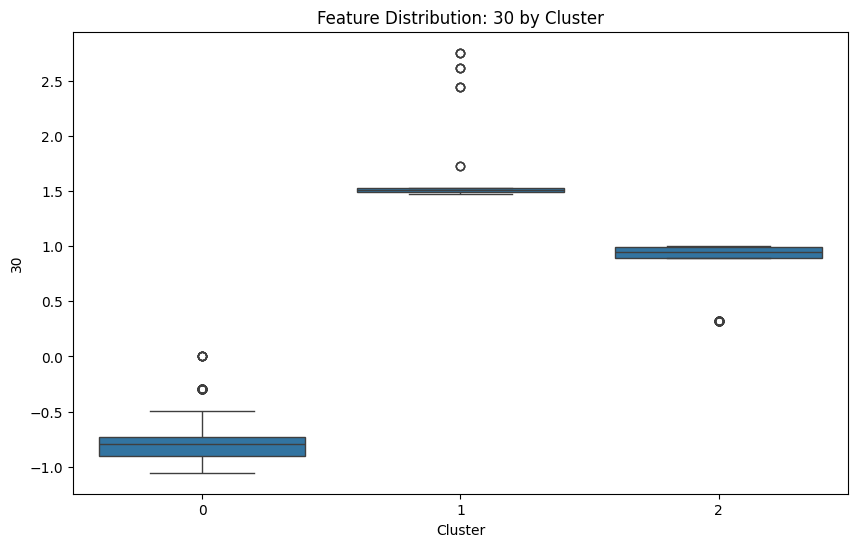

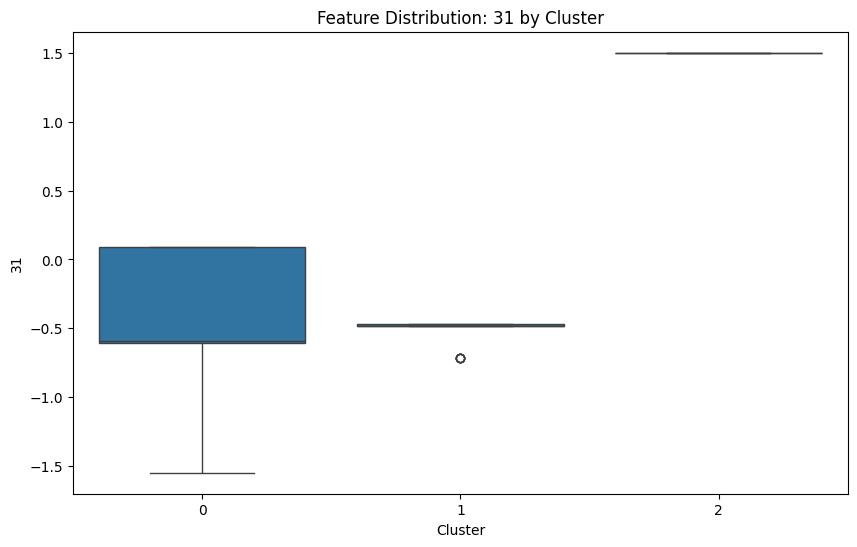

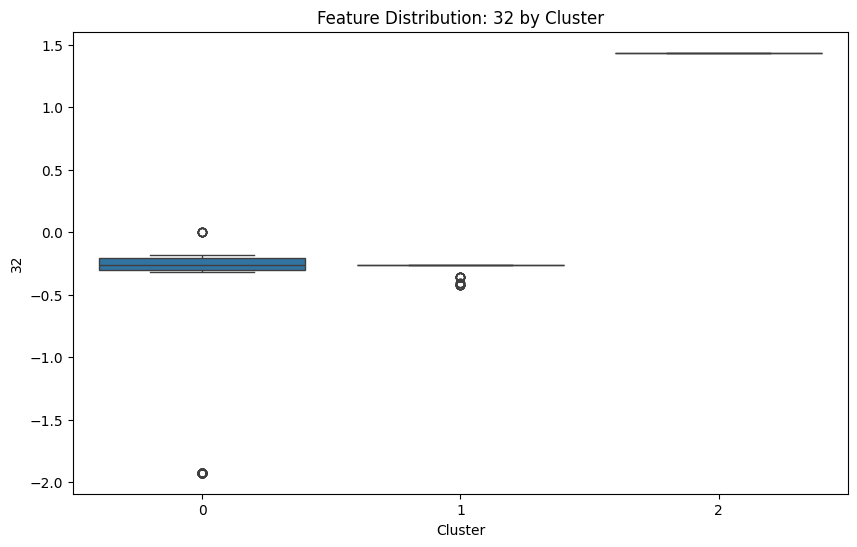

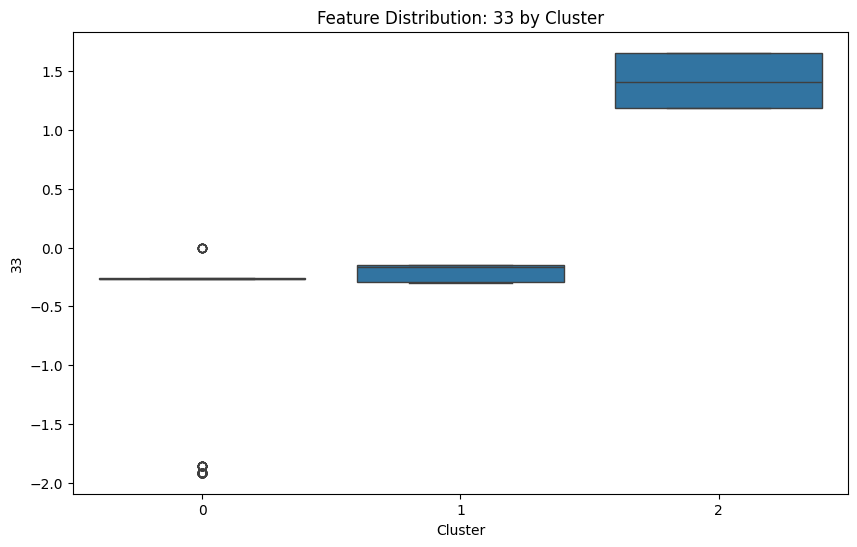

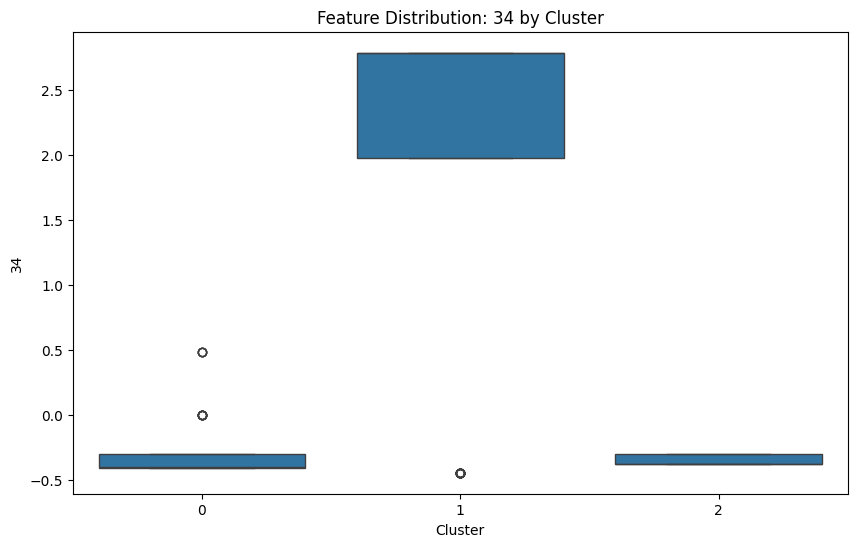

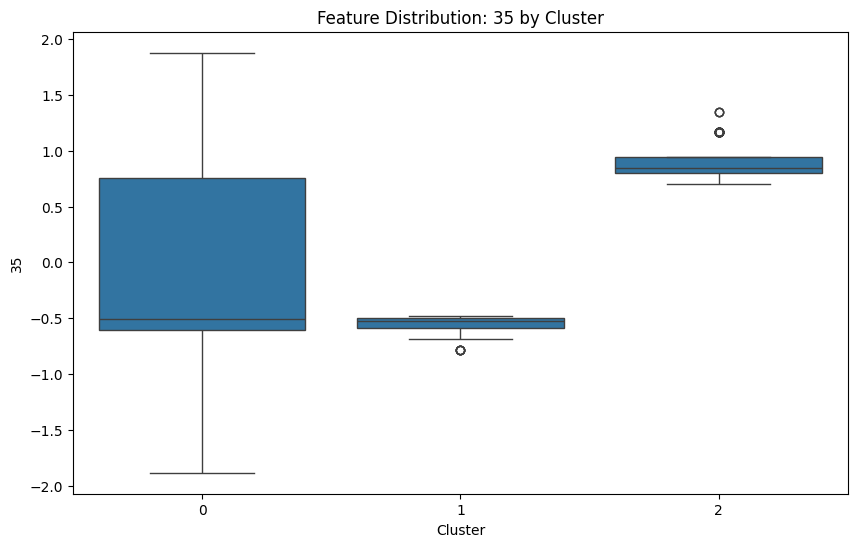

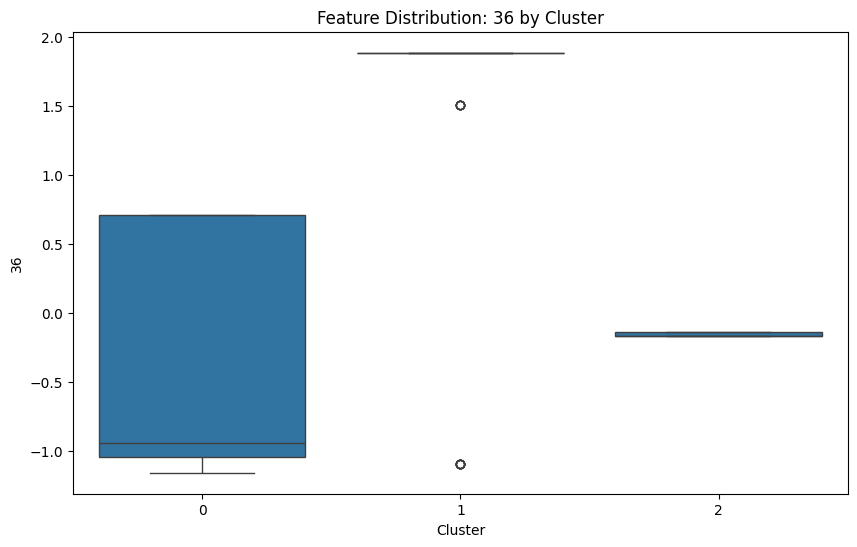

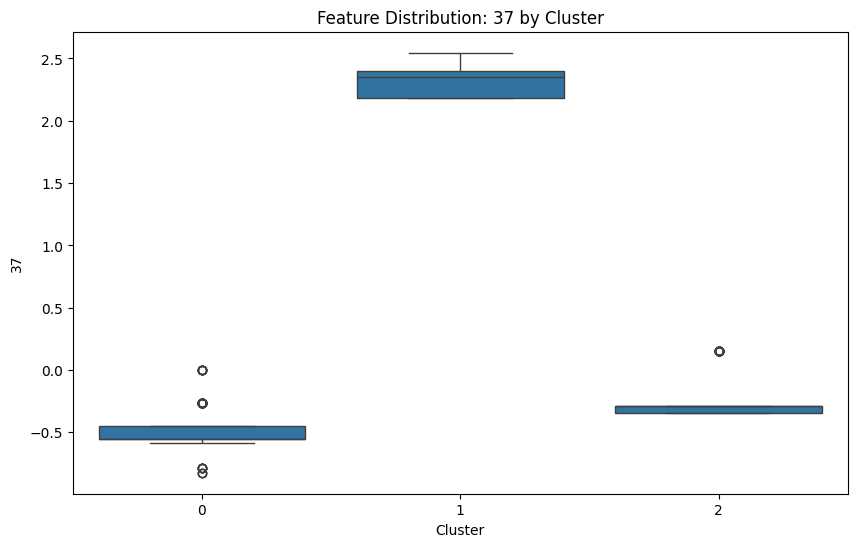

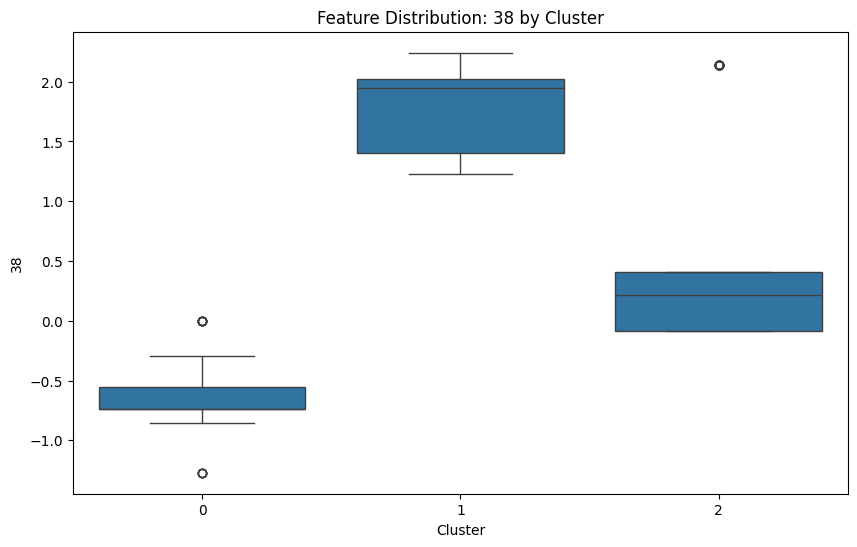

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load the clustered dataset
file_path = '/content/clustered_data.csv'  # Replace with your file path
df_clusters = pd.read_csv(file_path)

# Step 2: Summarize clusters
cluster_summary = df_clusters.groupby('Cluster').mean()

print("Cluster Summary (Mean Values for Each Feature):")
print(cluster_summary)

# Step 3: Distribution of data points in each cluster
cluster_counts = df_clusters['Cluster'].value_counts()

print("\nData Points in Each Cluster:")
print(cluster_counts)

# Step 4: Visualize distribution of data points
plt.figure(figsize=(8, 6))
sns.countplot(x='Cluster', data=df_clusters)
plt.title("Distribution of Data Points Across Clusters")
plt.xlabel("Cluster")
plt.ylabel("Number of Data Points")
plt.show()

# Step 5: Visualize feature distributions for each cluster
for column in df_clusters.columns[:-1]:  # Exclude the 'Cluster' column
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Cluster', y=column, data=df_clusters)
    plt.title(f"Feature Distribution: {column} by Cluster")
    plt.xlabel("Cluster")
    plt.ylabel(column)
    plt.show()

# Step 6: Pairwise feature relationships within clusters
sns.pairplot(df_clusters, hue='Cluster', diag_kind='kde', palette='Set1')
plt.suptitle("Pairwise Relationships Among Features by Cluster", y=1.02)
plt.show()

# Optional: Save the summary to a CSV file
##cluster_summary.to_csv('cluster_summary.csv', index=True)


Distribution of VITREOUS SEEDING TYPES Across Clusters:
VITREOUS_SEEDING_TYPE  CLOUD  DUST  NONE  SPHERE
Cluster                                         
0                          1     6    11       5
1                          4     0     1       0
2                          4     2     0       5


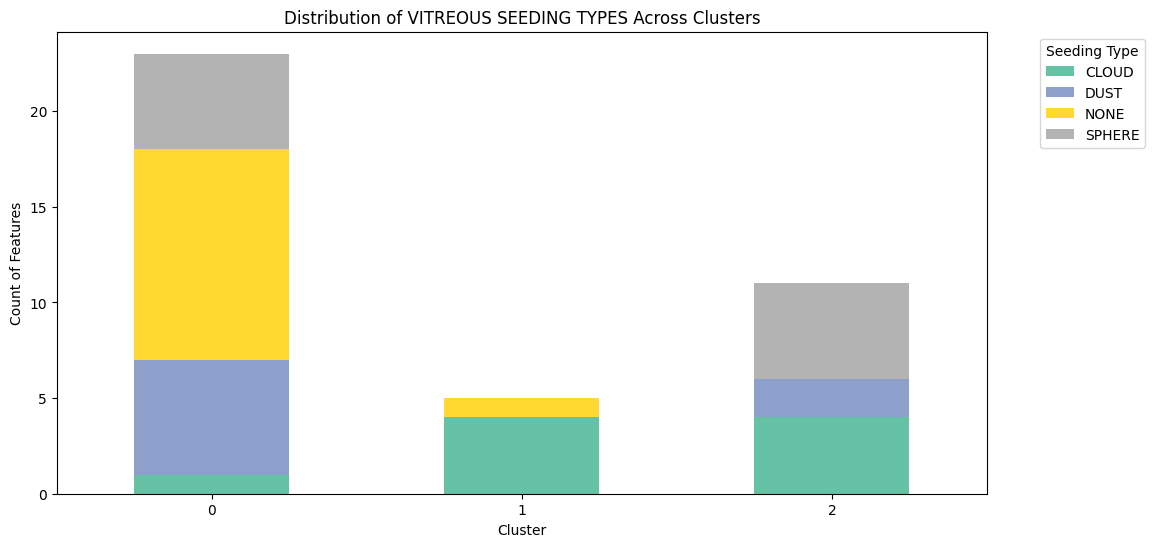

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Step 1: Load the dataset
file_path = '/content/dx samples ratio to median rb scna (2).xlsx'
df = pd.read_excel(file_path, header=None)

# Step 2: Extract relevant data
seeding_types = df.iloc[0, 3:].tolist()  # Row 0: VITREOUS SEEDING TYPE AT DIAGNOSIS
feature_ids = df.iloc[1, 3:].tolist()    # Row 1: Feature IDs
data = df.iloc[2:, 3:]                   # Rows 2 onward: Numerical data
data.columns = feature_ids               # Assign feature IDs as column names
data.reset_index(drop=True, inplace=True)

# Step 3: Handle NaN values
data = data.apply(pd.to_numeric, errors='coerce')  # Ensure all values are numeric
data.fillna(data.mean(), inplace=True)            # Replace NaNs with column means

# Step 4: Normalize the data
scaler = StandardScaler()
normalized_data = scaler.fit_transform(data.T)  # Transpose to cluster features, not rows

# Step 5: Perform clustering
optimal_clusters = 3  # Adjust as needed
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42, n_init=10)
clusters = kmeans.fit_predict(normalized_data)

# Step 6: Create a DataFrame for analysis
analysis_df = pd.DataFrame({
    "Feature_ID": feature_ids,
    "VITREOUS_SEEDING_TYPE": seeding_types,
    "Cluster": clusters
})

# Step 7: Analyze the distribution of seeding types in clusters
distribution = analysis_df.groupby(['Cluster', 'VITREOUS_SEEDING_TYPE']).size().unstack(fill_value=0)

# Step 8: Print the distribution
print("Distribution of VITREOUS SEEDING TYPES Across Clusters:")
print(distribution)

# Step 9: Visualize the results
distribution.plot(kind="bar", stacked=True, figsize=(12, 6), colormap="Set2")
plt.title("Distribution of VITREOUS SEEDING TYPES Across Clusters")
plt.xlabel("Cluster")
plt.ylabel("Count of Features")
plt.xticks(rotation=0)
plt.legend(title="Seeding Type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


Cluster Mean Values:
        0         1         2         3         4         5         6    \
0  1.168741  1.168741  1.168741  1.092043  1.092043  1.093957  1.095817   
1  1.593364  1.593364  1.593364  1.593364  1.593364  1.593364  1.593364   
2  1.751338  1.751338  1.751338  1.611843  1.611843  1.611843  1.541455   

        7         8         9    ...       685       686       687       688  \
0  1.095817  1.095817  1.095817  ...  0.978568  0.978568  0.978568  0.978568   
1  1.593364  1.593364  1.593364  ...  0.783338  0.783338  0.783338  0.783338   
2  1.541455  1.541455  1.541455  ...  0.551537  0.551537  0.551537  0.551537   

        689       690       691       692       693       694  
0  0.978568  0.978568  0.978568  0.978568  0.978568  0.978568  
1  0.815467  0.815467  0.815467  0.815467  0.815467  0.815467  
2  0.551537  0.551537  0.551537  0.551537  0.551537  0.551537  

[3 rows x 695 columns]


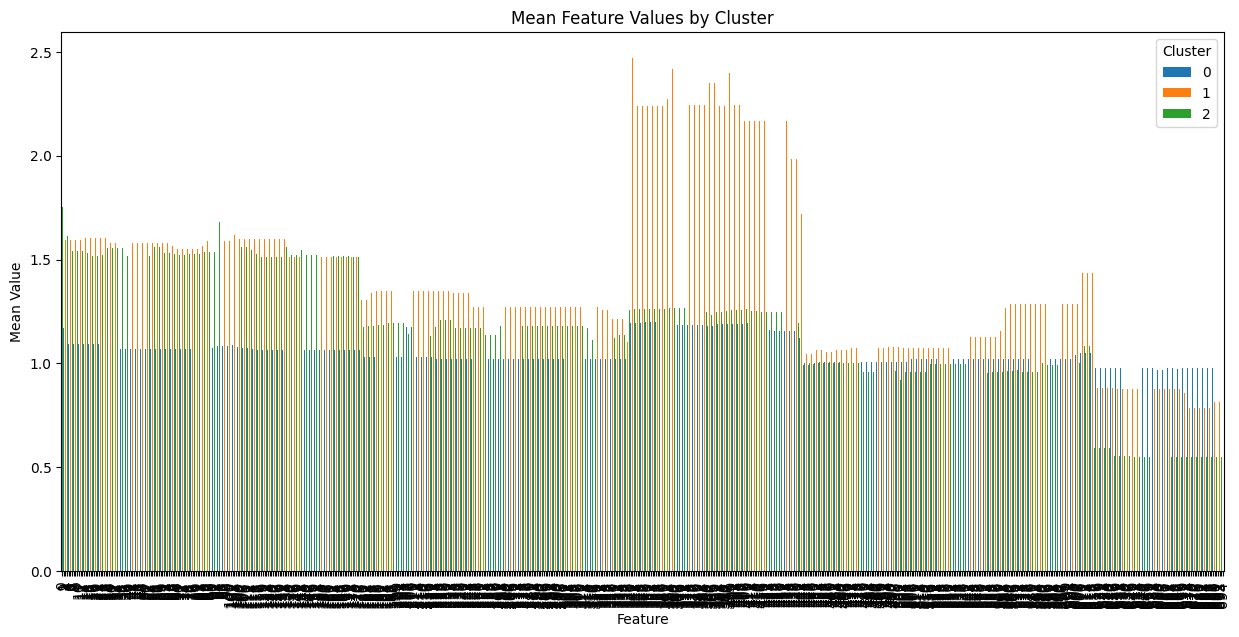

In [ ]:
cluster_means = data.T.groupby(clusters).mean()  # Mean values for each cluster
print("Cluster Mean Values:")
print(cluster_means)

# Visualize differences
cluster_means.T.plot(kind="bar", figsize=(15, 7))
plt.title("Mean Feature Values by Cluster")
plt.xlabel("Feature")
plt.ylabel("Mean Value")
plt.legend(title="Cluster")
plt.show()
